In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfClientes = pd.read_excel('caso_estudo.xlsx',sheet_name='clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx',sheet_name='lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx',sheet_name='produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx',sheet_name='vendas')
dfPag = pd.read_excel('caso_estudo.xlsx',sheet_name='pagamentos')
                           

# Análise inicial


In [3]:
dfClientes.sample(10 )

,id,nome,sexo,dt_nasc
546,547,Kaua Fernandes,M,10/17/2001
532,533,Larissa Melo,F,8/17/1944
120,121,André Ferreira,M,9/17/1939
272,273,Vitoria Rodrigues,F,1/3/1997
346,347,Eduardo Martins,M,5/10/1959
105,106,Laura Araujo,F,4/18/1974
211,212,Guilherme Carvalho,M,8/27/1962
66,67,Anna Melo,F,11/6/1995
163,164,Giovanna Araujo,F,9/30/1994
703,704,Caio Cavalcanti,M,8/1/1979


In [4]:
dfClientes.head(5)

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953


In [5]:
dfClientes.tail(5)

,id,nome,sexo,dt_nasc
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994
999,1000,Gustavo Barbosa,M,12/30/1975


In [6]:
dfClientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [7]:
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [8]:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [9]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<AxesSubplot: >

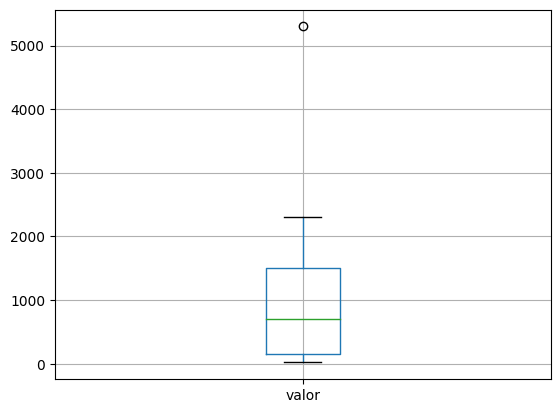

In [10]:
%matplotlib inline
dfProdutos[dfProdutos.valor < 3000000].boxplot(column=['valor'])

In [11]:
dfVendas[dfVendas.id_produto == 10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [12]:
dfVendas.describe()

,id,id_cliente,id_loja,id_produto
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [13]:
dfPag.describe()

,id,id_venda
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


# Data Cleaning

# Dados nulos

In [14]:
#Substituindo valores NaN por outros valores rastreáveis

dfClientes.loc[dfClientes.nome.isnull(),'nome'] = 'Sem nome' 
dfClientes.loc[dfClientes.sexo.isnull(),'sexo'] = 'O' 
dfClientes.loc[dfClientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2022' 

In [15]:
#Confirmando que as alterações foram feitas

dfClientes.loc[[269,287],:]

,id,nome,sexo,dt_nasc
269,270,Sem nome,M,1/1/2022
287,288,Victor Ribeiro,O,12/17/1974


In [16]:
#Confirmando que as alterações foram feitas

dfLojas.isnull().sum()

id        0
cidade    0
dtype: int64

In [17]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [18]:
dfProdutos.loc[9,'valor'] = dfProdutos.valor[9]/10000
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


<AxesSubplot: >

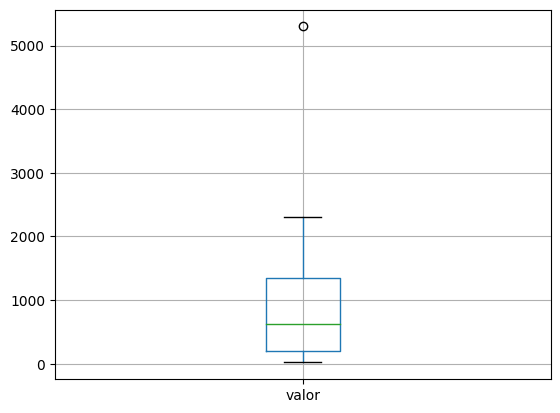

In [19]:
dfProdutos.boxplot(column=['valor'])

In [20]:
dfVendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [21]:
dfPag

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15
...,...,...,...
2067,2068,2990,2020-10-04
2068,2069,2992,2020-10-10
2069,2070,2994,2020-10-09
2070,2071,2996,2020-10-17


## Consistência

In [22]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)].count()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [23]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [24]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [25]:
dfPag[~dfPag.id_venda.isin(dfVendas.id)]

,id,id_venda,dt_pgto


In [26]:
dfVendas[~dfVendas.id.isin(dfPag.id_venda)]

,id,id_cliente,id_loja,id_produto,dt_venda
3,4,59,4,3,2018-01-05
5,6,52,8,3,2018-01-05
20,21,270,2,10,2018-01-12
21,22,465,2,3,2018-01-12
32,33,459,2,7,2018-01-13
...,...,...,...,...,...
2992,2993,764,2,7,2020-09-25
2994,2995,6,2,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


## Dados duplicados

In [27]:
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [28]:
dfClientes[dfClientes.nome == 'Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [29]:
dfClientes.drop('id', axis=1).duplicated().sum()

0

In [30]:
dfVendas.drop('id', axis=1).duplicated().sum()

1

In [31]:
dfVendas[dfVendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [32]:
dfProdutos.produto.duplicated().sum()

0

In [33]:
dfVendas[(dfVendas.id_cliente==559) & (dfVendas.id_loja==2) & (dfVendas.id_produto==5)]

##Será considerado que são 2 vendos,logo não será apagado nenhum das 2 linhas

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [34]:
dfPag.drop('id', axis=1).duplicated().sum()

0

## Formato de dados

In [35]:
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


In [36]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y')
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


## Index

In [37]:
dfClientes = dfClientes.set_index('id')
dfClientes

#Não existe mais a coluna id,agora o id é o index

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [38]:
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPag = dfPag.set_index('id')

In [39]:
dfProdutos

,produto,valor
id,,
1,mouse,20.0000
2,teclado,30.0000
3,laptop básico,2300.0000
4,laptop gamer,5300.0000
5,monitor,1500.0000
6,impressora,700.0000
7,carregador,150.0000
8,cadeira,540.0000
9,mesa,860.0000


# Data Fusion

In [40]:
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on='id_cliente')
df = df.join(dfLojas.add_prefix('loja_'), on='id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on='id_produto')
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [41]:
dfClientes.loc[393]

nome             Gustavo Silva
sexo                         M
dt_nasc    1950-01-04 00:00:00
Name: 393, dtype: object

In [42]:
df = df.join(dfPag.set_index('id_venda'))
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


In [43]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

# Feature Engineering

In [44]:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(),'pg'] = 0
#df.loc = [linhas,nome_coluna]

In [45]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days

In [46]:
df['cliente_idade'] = np.floor((pd.to_datetime('today') - df.cliente_dt_nasc)/np.timedelta64(1,'Y'))
df 

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,72.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,50.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,60.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,80.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,23.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,28.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,36.0


# Análise de Vendas e Receitas

## Lojas e Produtos que mais vendem

In [47]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por loja')

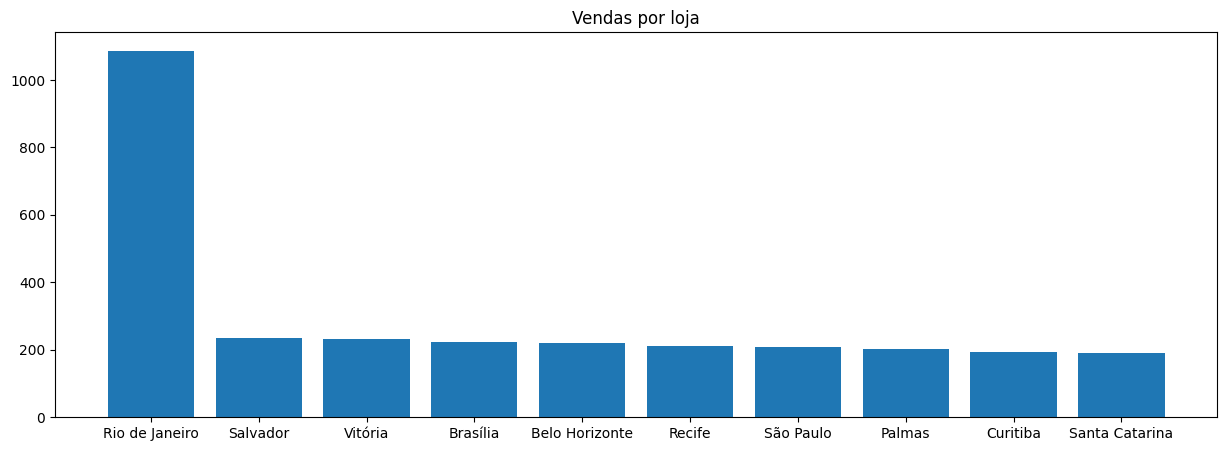

In [48]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Vendas por loja')

## Produtos que mais vendem

In [49]:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por produto')

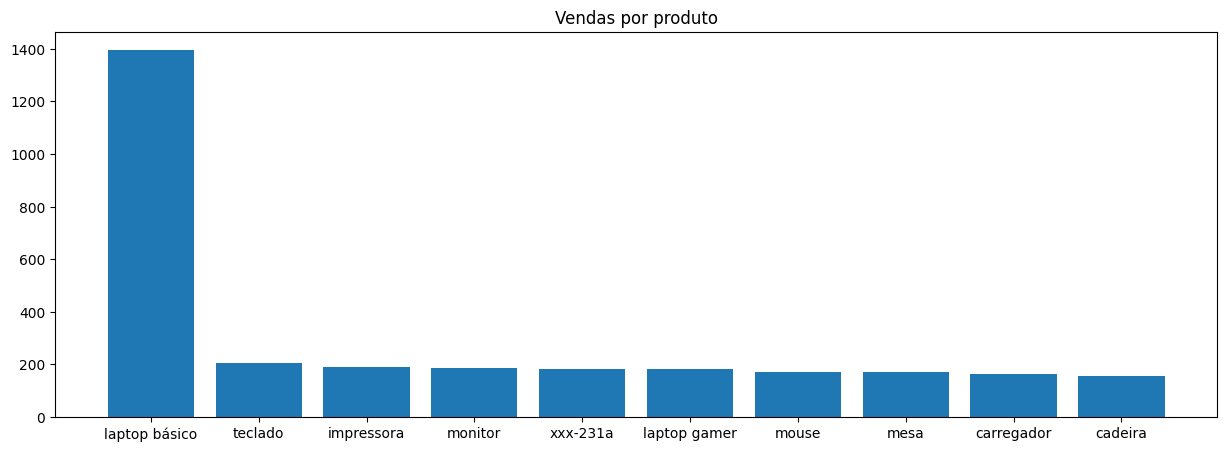

In [50]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Vendas por produto')

#plt.bar(categoria,valores)

## Receita por loja

In [51]:
df[['loja_cidade','produto_valor']].groupby('loja_cidade').sum().sort_values(ascending=False,by='produto_valor')
## O de cima é um dataframe
## ou 
graf_dados = df[['loja_cidade','produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
##O de cima é uma série,que o gráfico de barra opera melhor
graf_dados

loja_cidade
Rio de Janeiro    1.797907e+06
Brasília          3.779836e+05
Belo Horizonte    3.757225e+05
Salvador          3.752382e+05
Vitória           3.655850e+05
São Paulo         3.407579e+05
Recife            3.329236e+05
Palmas            3.168370e+05
Santa Catarina    3.133314e+05
Curitiba          3.032404e+05
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'Receita por loja')

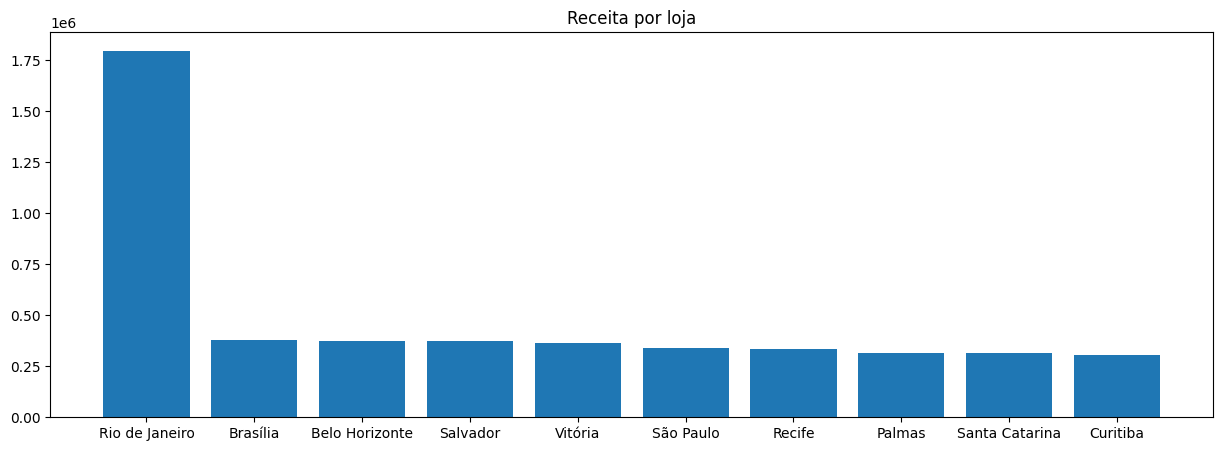

In [52]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Receita por loja')

In [53]:
print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (graf_dados.max(), graf_dados.max()/graf_dados[graf_dados!=graf_dados.max()].mean(), graf_dados[graf_dados!=graf_dados.max()].mean()))

O maior valor é 1797906, sendo 5.22 vezes a média dos demais, que é 344624


## Receita por produto

In [54]:
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
graf_dados

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'Receita por produto')

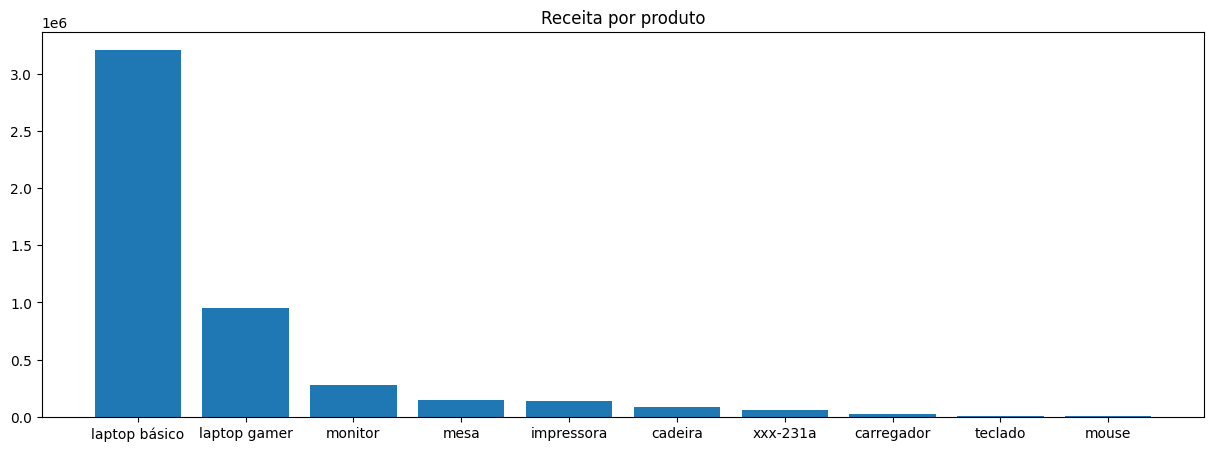

In [55]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Receita por produto')

## Subplots

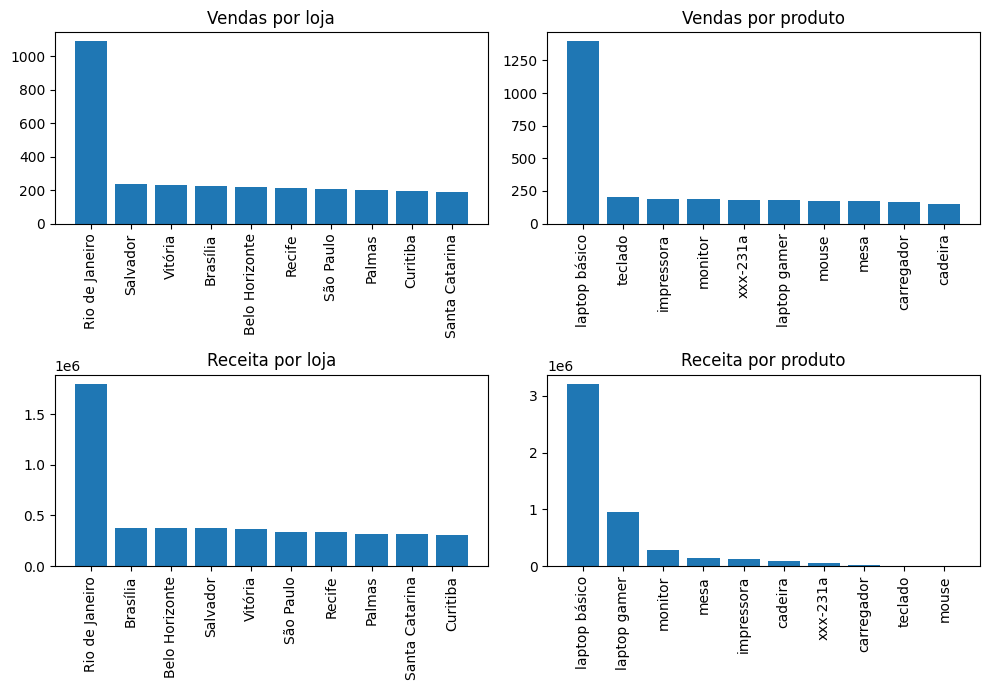

In [56]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Vendas por loja')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Vendas por produto')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
graf_dados = df[['loja_cidade','produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Receita por loja')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Receita por produto')
plt.xticks(rotation=90)



plt.tight_layout()  ##Essa linha é para os graficos não se sobreporem

## Receita por cliente

In [57]:
graf_dados=df[['cliente_nome','produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False)
graf_dados

cliente_nome
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
                       ...    
Julieta Barros         20.0000
Thaís Pinto            20.0000
Giovana Barbosa        20.0000
Diego Sousa            20.0000
José Pinto             20.0000
Name: produto_valor, Length: 861, dtype: float64

Text(0.5, 1.0, 'Receita por cliente')

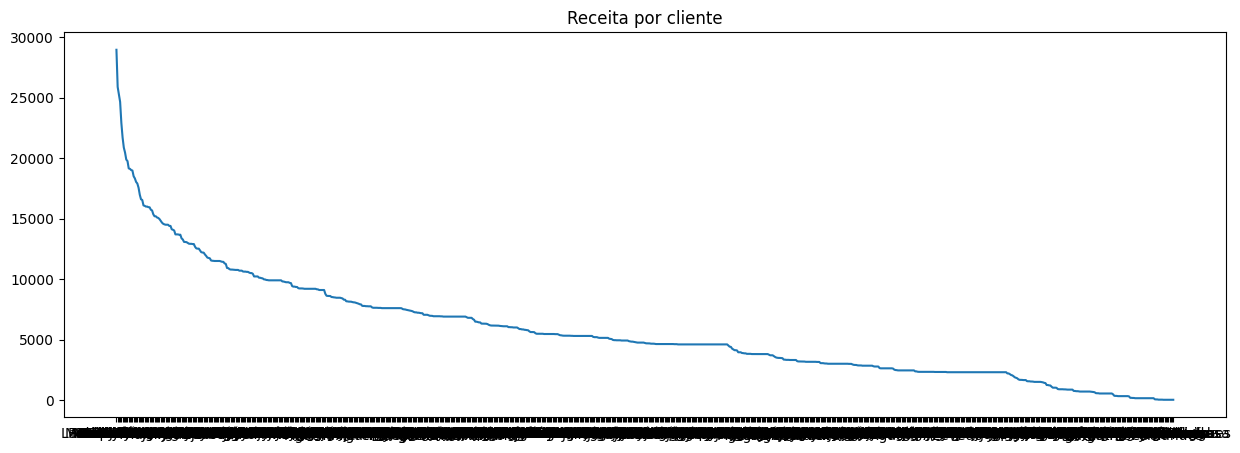

In [58]:
plt.figure(figsize=(15,5))
plt.plot(graf_dados.index,graf_dados.values)
plt.title('Receita por cliente')

Text(0.5, 1.0, 'Receita por cliente')

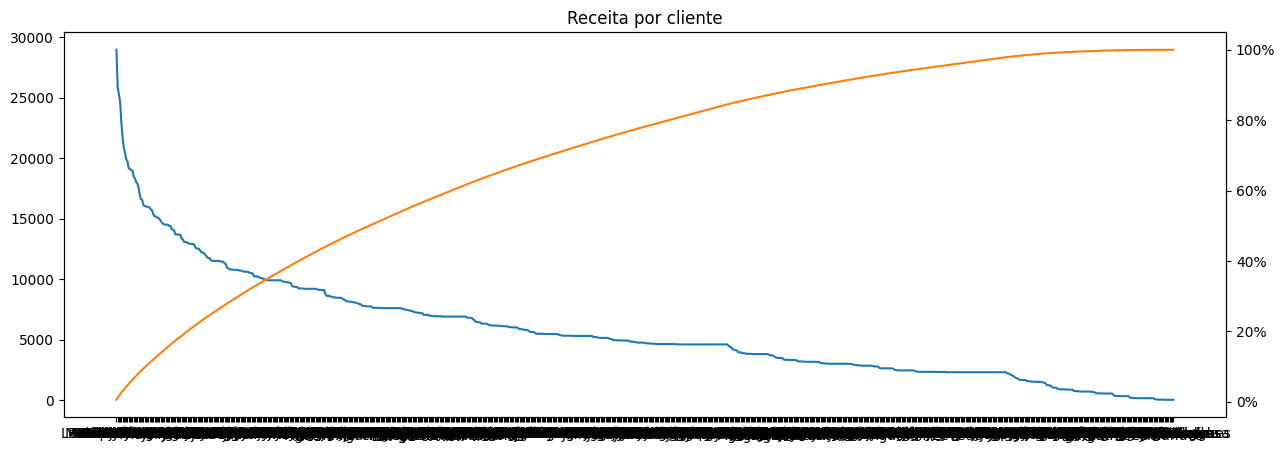

In [59]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(graf_dados.index,graf_dados.values,color='C0')

ax2 = ax.twinx()
ax2.plot(graf_dados.index,graf_dados.values.cumsum()/graf_dados.values.sum()*100,color='C1')
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.title('Receita por cliente')

In [60]:
receita_acumulada = graf_dados.cumsum()/graf_dados.sum()
print(receita_acumulada)
receita_acumulada[receita_acumulada<0.6].count() / receita_acumulada.count()

cliente_nome
Leila Costa         0.005913
Melissa Lima        0.011197
Lavinia Carvalho    0.016353
Fernanda Pinto      0.021386
Felipe Castro       0.026064
                      ...   
Julieta Barros      0.999984
Thaís Pinto         0.999988
Giovana Barbosa     0.999992
Diego Sousa         0.999996
José Pinto          1.000000
Name: produto_valor, Length: 861, dtype: float64


0.3170731707317073

## Pareto

Text(0.5, 1.0, 'Pareto de receita por produto')

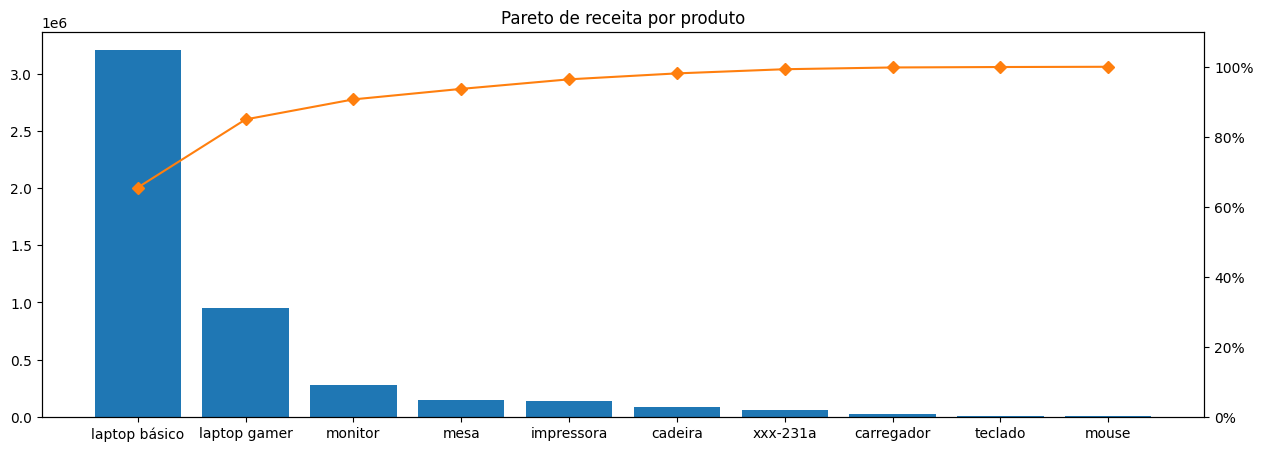

In [61]:
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(graf_dados.index,graf_dados.values,color='C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index,graf_dados.values.cumsum()/graf_dados.values.sum()*100,color='C1',marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title('Pareto de receita por produto')

## Receita combinando produto-loja

In [62]:
graf_dados = pd.DataFrame(columns=('Loja', 'Produto', 'Receita'))
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados = pd.concat([pd.DataFrame({
            'Loja' : [cidade],
            'Produto' : [produto],
            'Receita' : [df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()]
        }), graf_dados], ignore_index=True)
graf_dados

,Loja,Produto,Receita
0,Vitória,xxx-231a,7064.9744
1,Vitória,mesa,12040.0000
2,Vitória,cadeira,5400.0000
3,Vitória,carregador,2100.0000
4,Vitória,impressora,8400.0000
...,...,...,...
95,São Paulo,monitor,30000.0000
96,São Paulo,laptop gamer,63600.0000
97,São Paulo,laptop básico,223100.0000
98,São Paulo,teclado,510.0000


<AxesSubplot: xlabel='Produto', ylabel='Loja'>

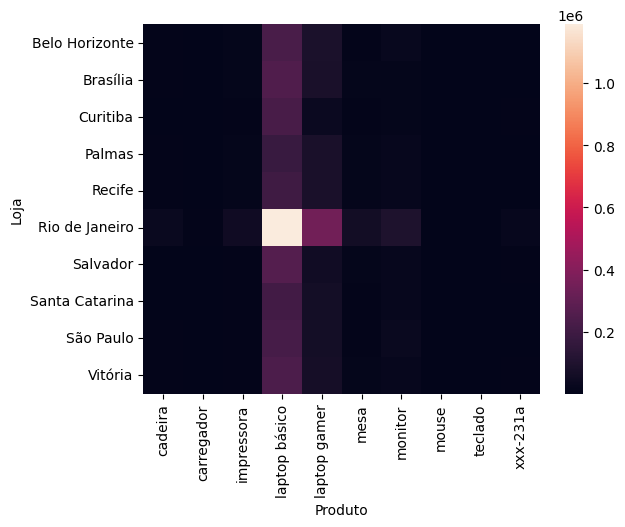

In [63]:
import seaborn as sns
graf_dados = graf_dados.pivot_table(index='Loja', columns='Produto', values='Receita', aggfunc='sum')
sns.heatmap(graf_dados)

In [64]:
graf_dados = pd.DataFrame(columns=('Loja', 'Produto', 'Receita'))
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados = pd.concat([pd.DataFrame({
            'Loja' : [cidade],
            'Produto' : [produto],
            'Receita' : [df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()]
        }), graf_dados], ignore_index=True)
graf_dados

,Loja,Produto,Receita
0,Vitória,xxx-231a,7064.9744
1,Vitória,mesa,12040.0000
2,Vitória,cadeira,5400.0000
3,Vitória,carregador,2100.0000
4,Vitória,impressora,8400.0000
...,...,...,...
95,São Paulo,monitor,30000.0000
96,São Paulo,laptop gamer,63600.0000
97,São Paulo,laptop básico,223100.0000
98,São Paulo,teclado,510.0000


In [65]:
graf_dados['lojaprod'] = graf_dados.Loja + '-' + graf_dados.Produto
graf_dados

,Loja,Produto,Receita,lojaprod
0,Vitória,xxx-231a,7064.9744,Vitória-xxx-231a
1,Vitória,mesa,12040.0000,Vitória-mesa
2,Vitória,cadeira,5400.0000,Vitória-cadeira
3,Vitória,carregador,2100.0000,Vitória-carregador
4,Vitória,impressora,8400.0000,Vitória-impressora
...,...,...,...,...
95,São Paulo,monitor,30000.0000,São Paulo-monitor
96,São Paulo,laptop gamer,63600.0000,São Paulo-laptop gamer
97,São Paulo,laptop básico,223100.0000,São Paulo-laptop básico
98,São Paulo,teclado,510.0000,São Paulo-teclado


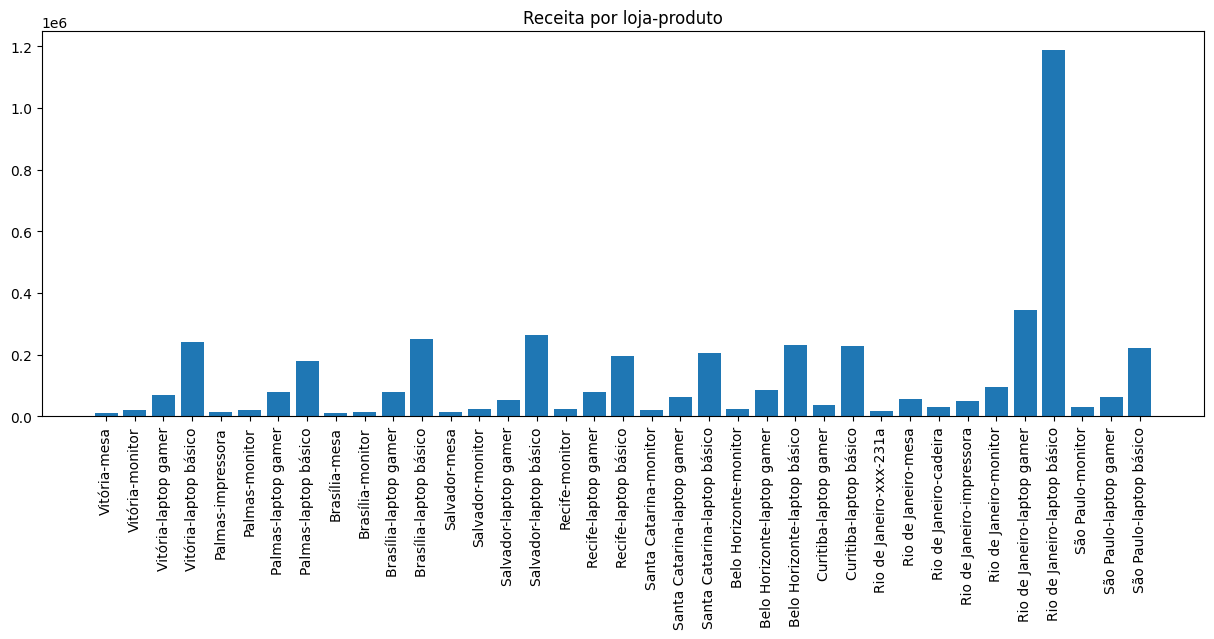

In [66]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.lojaprod[graf_dados.Receita>0.01*graf_dados.Receita.max()], graf_dados.Receita[graf_dados.Receita>0.01*graf_dados.Receita.max()])
plt.xticks(rotation=90)
plt.title('Receita por loja-produto')
plt.show()

# Análise de tempo

## Tempo médio de pagamento

In [67]:
df.tempo_pg.mean()

22.47200772200772

Text(0.5, 1.0, 'tempo de pagamento')

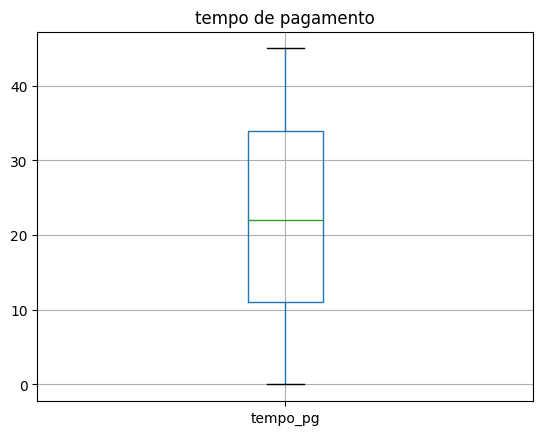

In [68]:
df.boxplot('tempo_pg')
plt.title('tempo de pagamento')

Text(0.5, 1.0, 'histograma de tempo de pagamento')

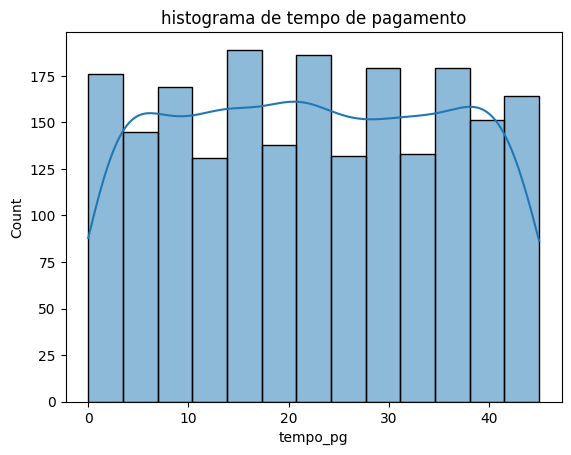

In [69]:
sns.histplot(df.tempo_pg, kde=True)
plt.title('histograma de tempo de pagamento')

In [70]:
df.tempo_pg.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: tempo_pg, dtype: float64

## Tempo de pagamento por cidade e produto

In [71]:
df.groupby('loja_cidade').mean(numeric_only=True).tempo_pg

loja_cidade
Belo Horizonte    21.430939
Brasília          22.269430
Curitiba          23.550898
Palmas            23.294444
Recife            22.301075
Rio de Janeiro    23.363855
Salvador          21.644860
Santa Catarina    19.769231
São Paulo         23.087432
Vitória           22.710660
Name: tempo_pg, dtype: float64

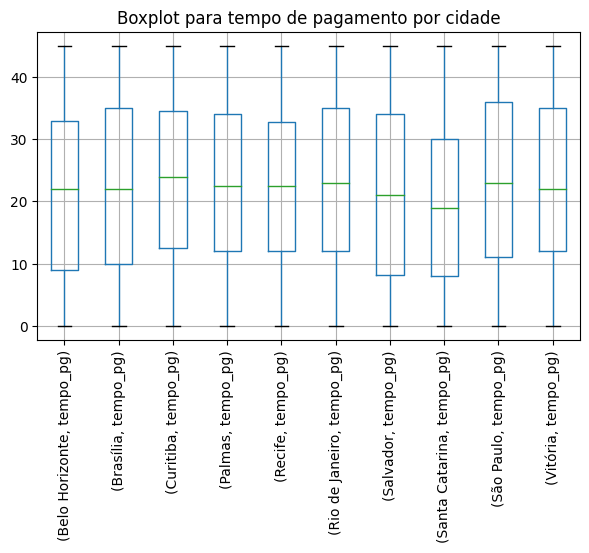

In [72]:
plt.figure(figsize=(7,4))
df[['loja_cidade','tempo_pg']].groupby('loja_cidade').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

In [73]:
df.groupby('produto_produto').tempo_pg.mean()


produto_produto
cadeira          23.734513
carregador       22.051724
impressora       21.383459
laptop básico    22.980513
laptop gamer     21.763889
mesa             20.300885
monitor          22.021277
mouse            22.912698
teclado          22.104575
xxx-231a         21.823077
Name: tempo_pg, dtype: float64

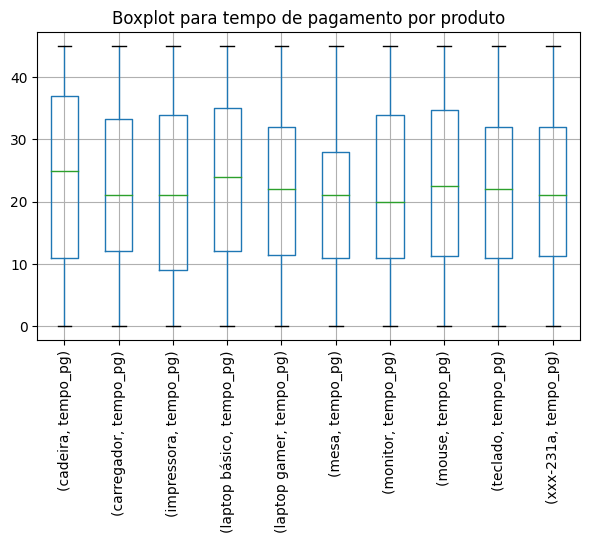

In [74]:
plt.figure(figsize=(7,4))
df[['produto_produto','tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por produto')
plt.xticks(rotation=90)
plt.show()

## Sazonalidade

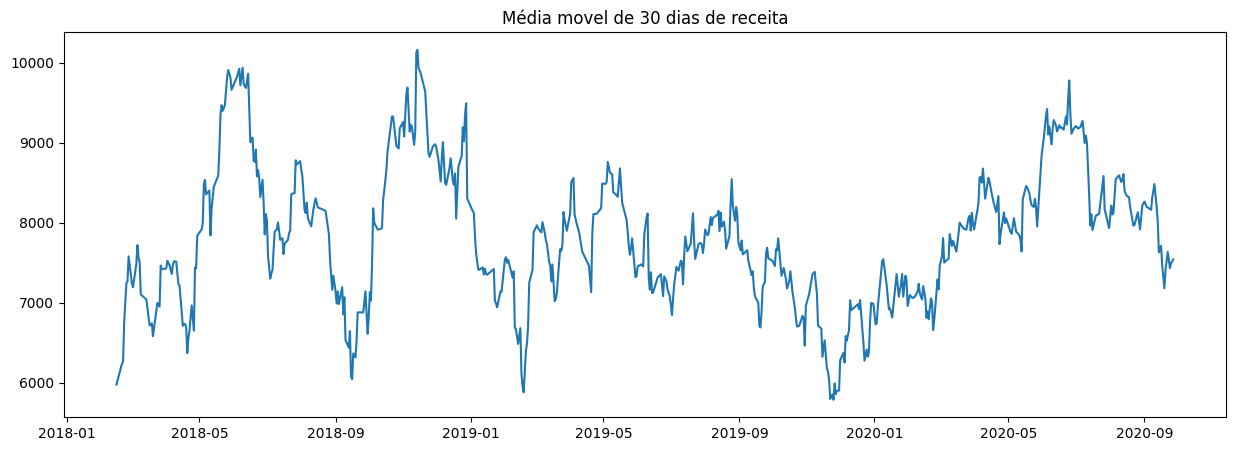

In [75]:
plt.figure(figsize=(15,5))
df
graf_dados = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()
plt.plot(graf_dados.index,graf_dados.values)
plt.title('Média movel de 30 dias de receita')
plt.show()

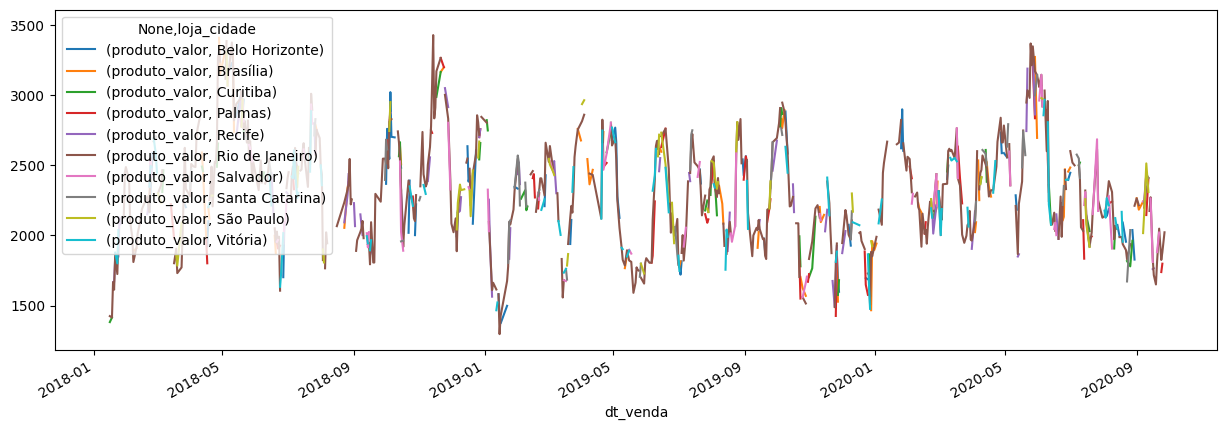

In [76]:
#plotar média móvel da receita por cidade
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor','loja_cidade','dt_venda']].groupby(['dt_venda','loja_cidade']).sum().rolling(30).mean().unstack().plot(ax=ax)

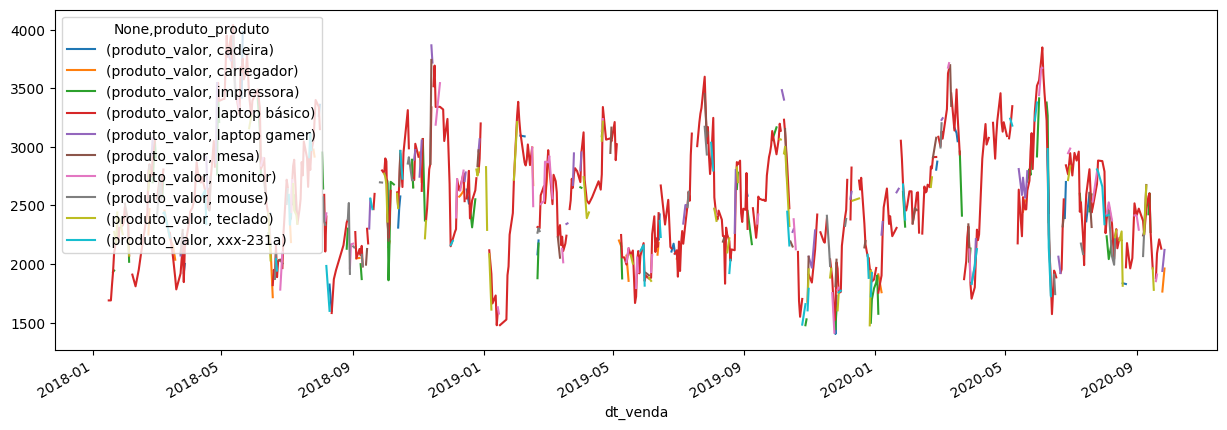

In [77]:
#plotar média móvel da receita por produto
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor','produto_produto','dt_venda']].groupby(['dt_venda','produto_produto']).sum().rolling(30).mean().unstack().plot(ax=ax)

In [78]:
# criando uma nova coluna contendo o ano da venda
df['venda_ano'] = pd.DatetimeIndex(df.dt_venda).year

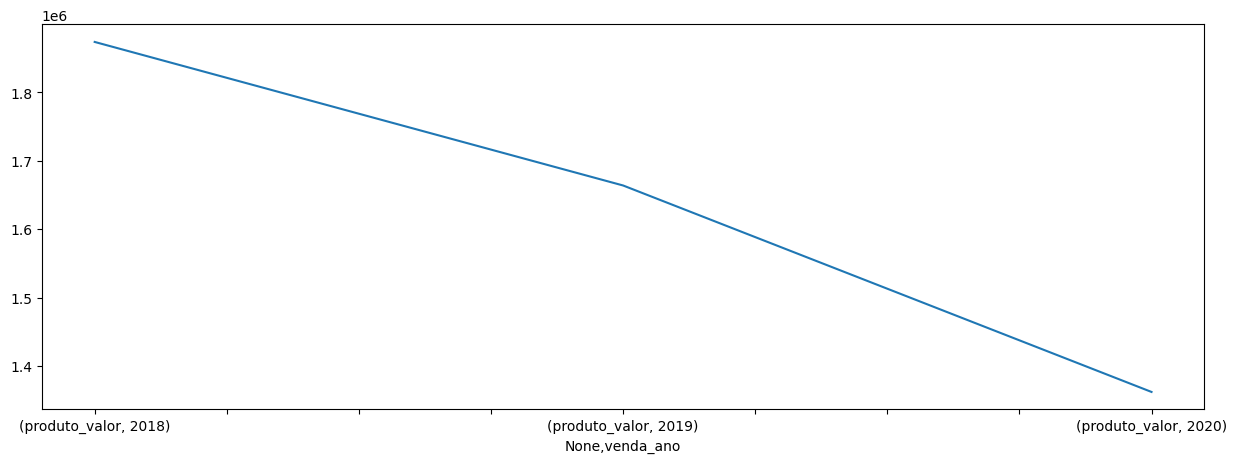

In [79]:
# tendencia de receita por ano
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor','venda_ano']].groupby(['venda_ano']).sum().unstack().plot(ax=ax)

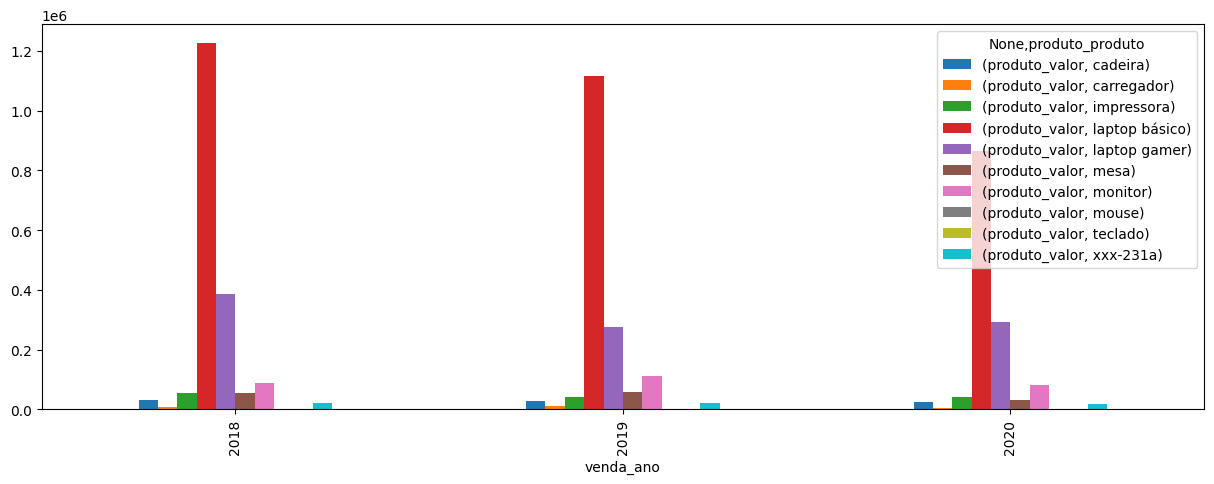

In [80]:
# tendência por produto
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor','produto_produto','venda_ano']].groupby(['venda_ano','produto_produto']).sum().unstack().plot.bar(ax=ax)

<AxesSubplot: xlabel='venda_ano'>

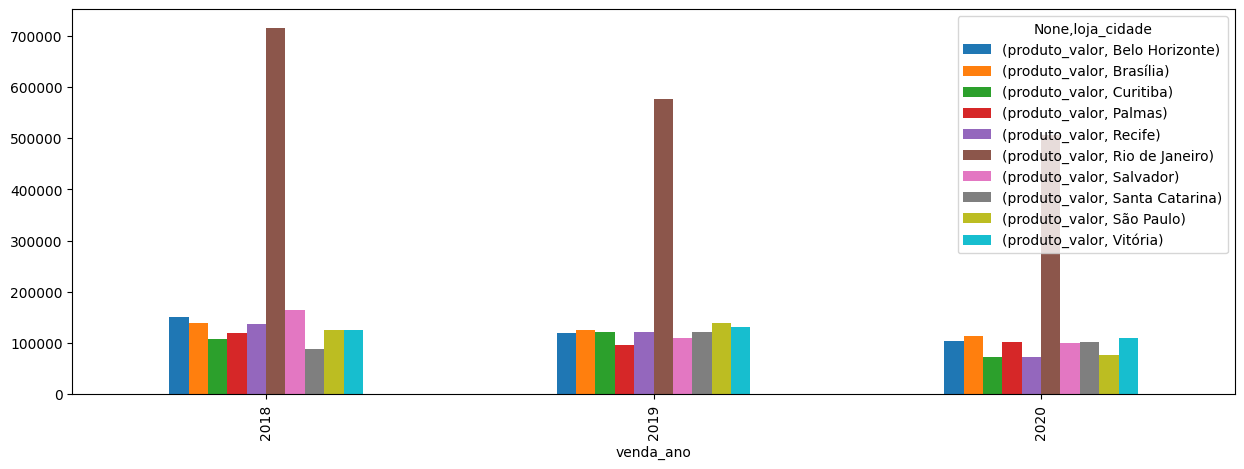

In [81]:
# tendência por cidade
fig, ax = plt.subplots(figsize=(15,5))
df[['produto_valor','loja_cidade','venda_ano']].groupby(['venda_ano','loja_cidade']).sum().unstack().plot.bar(ax=ax)

## Tempo médio de pagamento por promoção

In [82]:
dfPromo = pd.read_csv('caso_estudo_venda_promocao.csv', sep=";")

In [83]:
dfPromo

,id_venda,promoção
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0
...,...,...
2995,2996,0
2996,2997,0
2997,2998,0
2998,2999,0


In [84]:
dfPromo = dfPromo.set_index('id_venda')
dfPromo

,promoção
id_venda,
1,0
2,1
3,1
4,0
5,0
...,...
2996,0
2997,0
2998,0


In [85]:
df = df.join(dfPromo,  rsuffix=" ")
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,72.0,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,50.0,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,60.0,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,80.0,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,81.0,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,23.0,2020,0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,28.0,2020,0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,36.0,2020,0


,tempo_pg,promoção
id,,
1,20.0,0
2,44.0,1
3,41.0,1
5,18.0,0
7,40.0,1
...,...,...
2990,10.0,0
2992,15.0,0
2994,14.0,0


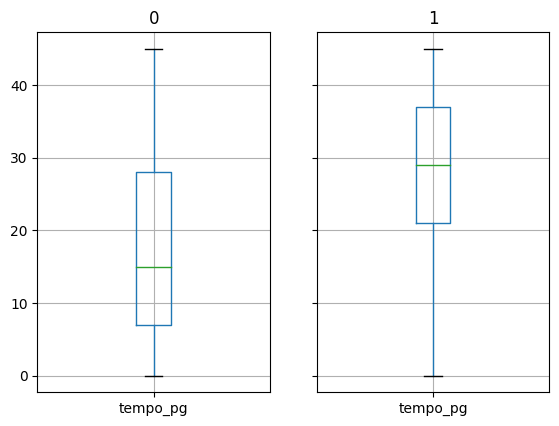

In [86]:
graf_dados = df[['tempo_pg','promoção']][~df.tempo_pg.isnull()]
graf_dados.groupby('promoção').boxplot(column = 'tempo_pg')
graf_dados

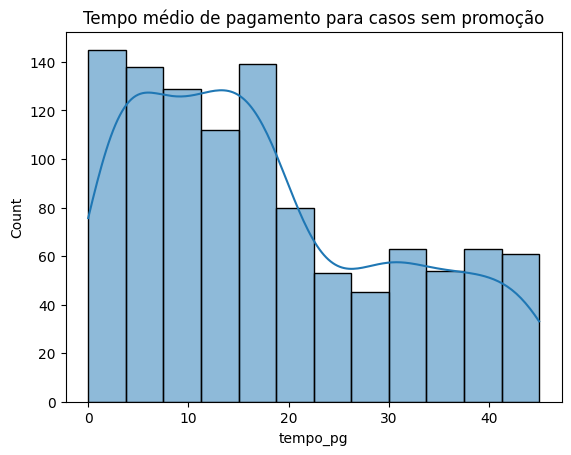

In [87]:
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==0], kde=True)
plt.title('Tempo médio de pagamento para casos sem promoção')
plt.show()

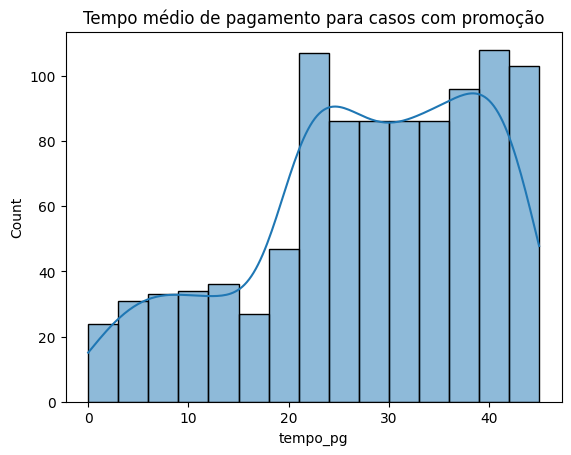

In [88]:
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==1], kde=True)
plt.title('Tempo médio de pagamento para casos com promoção')
plt.show()

# Análise de inadimplência

## Inadimplência por loja

<function matplotlib.pyplot.show(close=None, block=None)>

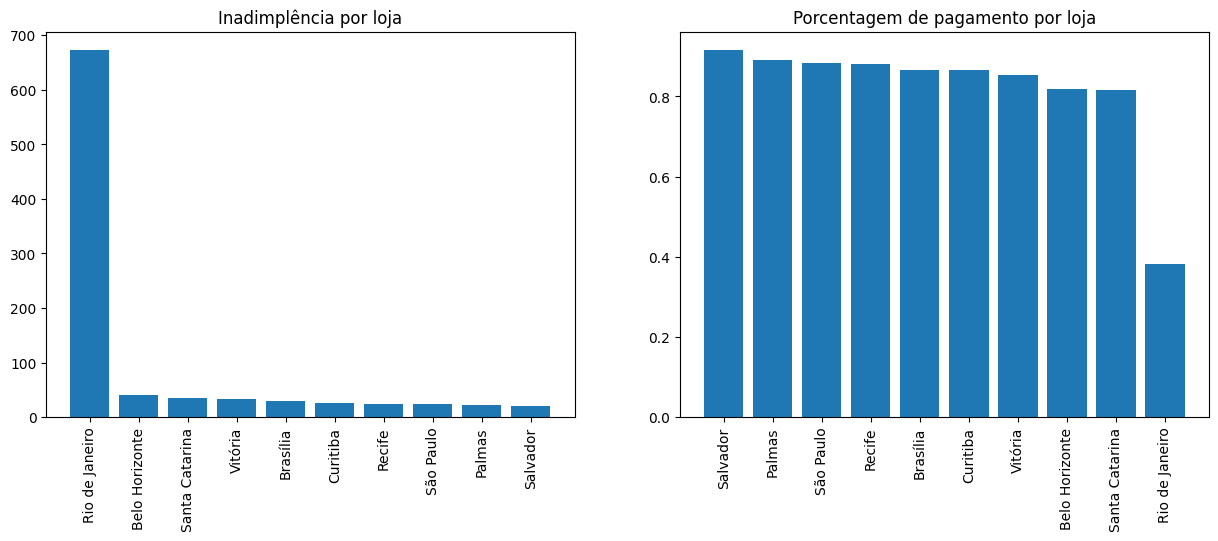

In [89]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados=df[df.pg==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Inadimplência por loja')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
graf_dados=df.groupby('loja_cidade').mean(numeric_only=True).pg.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Porcentagem de pagamento por loja')
plt.xticks(rotation=90)

plt.show

In [90]:
graf_dados

loja_cidade
Salvador          0.914530
Palmas            0.891089
São Paulo         0.884058
Recife            0.881517
Brasília          0.865471
Curitiba          0.865285
Vitória           0.852814
Belo Horizonte    0.819005
Santa Catarina    0.816754
Rio de Janeiro    0.381785
Name: pg, dtype: float64

## Inadimplência por produto

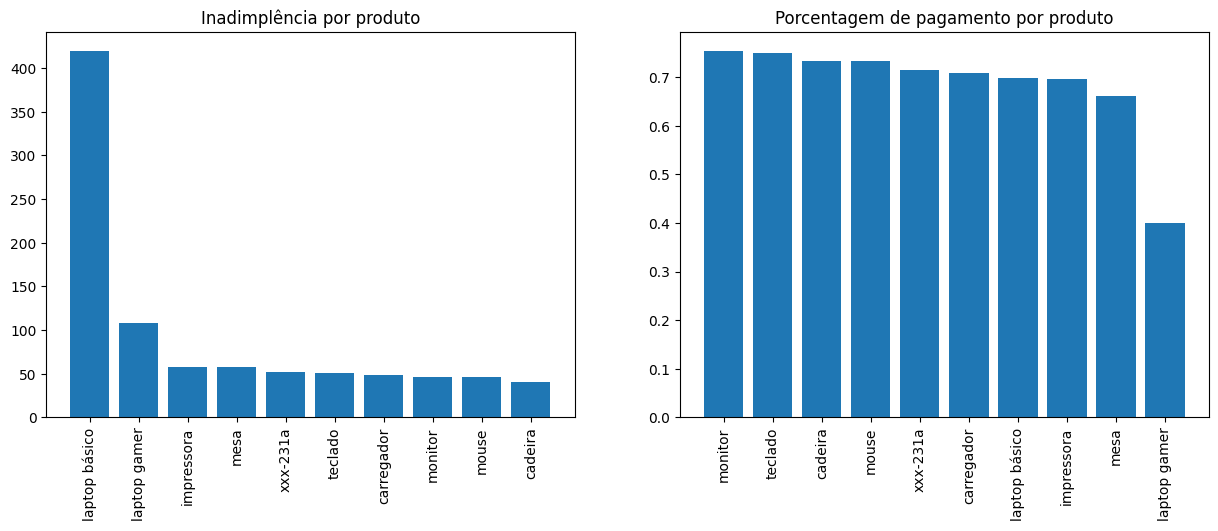

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.xticks(rotation=90)
plt.title('Inadimplência por produto')

plt.subplot(1,2,2)
graf_dados = df.groupby('produto_produto').mean(numeric_only=True).pg.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.xticks(rotation=90)
plt.title('Porcentagem de pagamento por produto')

plt.show()

In [92]:
graf_dados

produto_produto
monitor          0.754011
teclado          0.750000
cadeira          0.733766
mouse            0.732558
xxx-231a         0.714286
carregador       0.707317
laptop básico    0.698925
impressora       0.696335
mesa             0.660819
laptop gamer     0.400000
Name: pg, dtype: float64

## Impacto da inadimplência na receita

Text(0.5, 1.0, 'Porcentagem do lucro perdido')

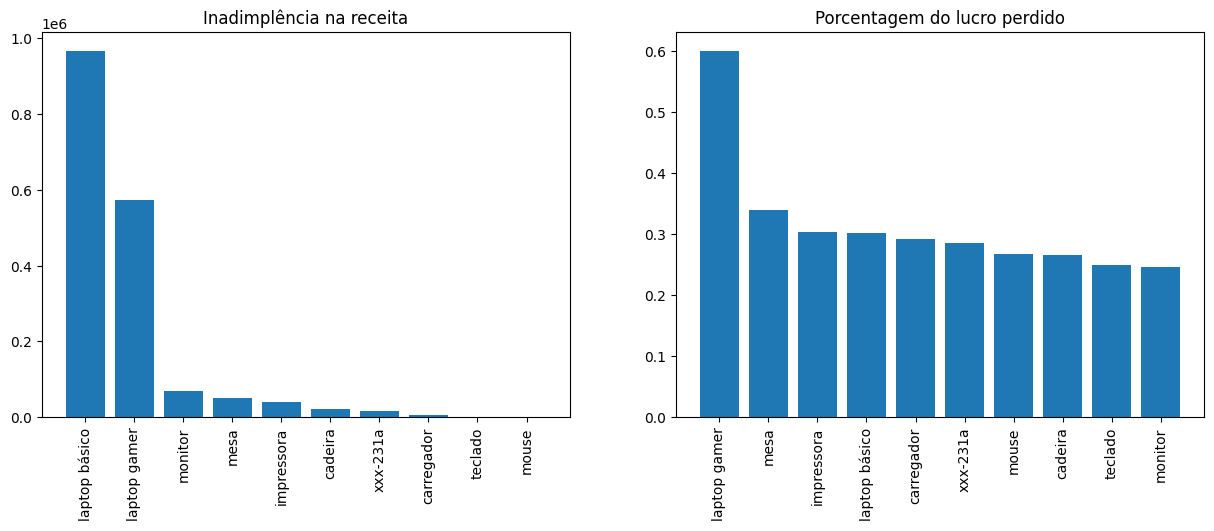

In [93]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados=df[df.pg==0].groupby('produto_produto').sum(numeric_only=True).produto_valor.sort_values(ascending=False)
# Aqui graf_dados é uma sequência
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Inadimplência na receita')
plt.xticks(rotation=90)




plt.subplot(1,2,2)
y = df[df.pg==1].groupby('produto_produto').sum(numeric_only=True).sort_values(ascending=False,by='produto_valor')
# Aqui y é dataframes

z = ( graf_dados / (graf_dados + y['produto_valor']) ).sort_values(ascending=False)

plt.bar(z.index,z.values)
plt.xticks(rotation=90)
plt.title('Porcentagem do lucro perdido')




Text(0.5, 1.0, 'Porcentagem do lucro perdido')

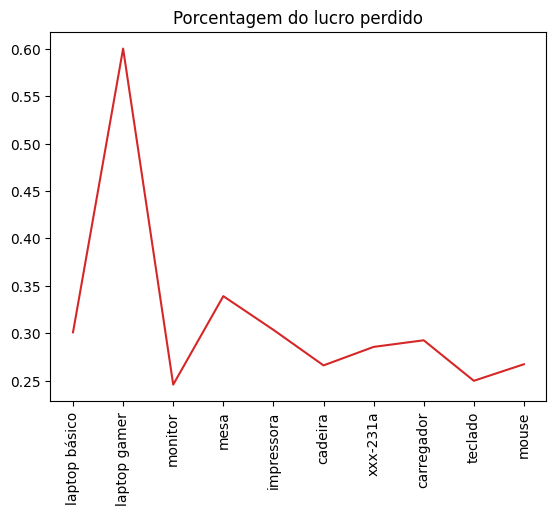

In [94]:
x = df[df.pg==0].groupby('produto_produto').sum(numeric_only=True).sort_values(ascending=False,by='produto_valor')
y = df[df.pg==1].groupby('produto_produto').sum(numeric_only=True).sort_values(ascending=False,by='produto_valor')


z = x['produto_valor'] /  (x['produto_valor']+y['produto_valor'])

plt.plot(z.index,z.values, color='C3')
plt.xticks(rotation=90)
plt.title('Porcentagem do lucro perdido')


In [95]:
z=z.to_frame()
z
# Transforma uma varíável em dataframe

,produto_valor
produto_produto,
laptop básico,0.301075
laptop gamer,0.600000
monitor,0.245989
mesa,0.339181
impressora,0.303665
cadeira,0.266234
xxx-231a,0.285714
carregador,0.292683
teclado,0.250000


## Inadimplência por idade

<AxesSubplot: xlabel='cliente_idade'>

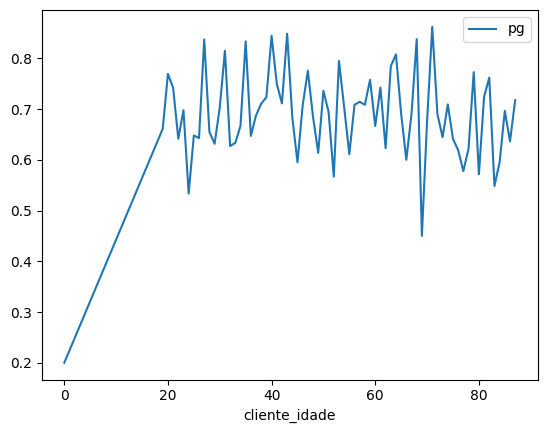

In [96]:
graf_dados = df[['cliente_idade','pg']].groupby('cliente_idade').mean(numeric_only=True).sort_values(ascending=False, by='cliente_idade')
graf_dados.plot()

# A média mostra a % de pagamentos realizados por idade

In [97]:
df[df.cliente_idade<1]

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
21,270,2,10,2018-01-12,Sem nome,M,2022-01-01,Rio de Janeiro,xxx-231a,321.1352,NaT,0,NaN,0.0,2018,0
1059,269,5,4,2018-12-15,Sem nome,F,2022-01-01,Santa Catarina,laptop gamer,5300.0000,NaT,0,NaN,0.0,2018,0
1745,269,9,3,2019-08-03,Sem nome,F,2022-01-01,Palmas,laptop básico,2300.0000,2019-09-03,1,31.0,0.0,2019,1
1900,269,2,3,2019-09-22,Sem nome,F,2022-01-01,Rio de Janeiro,laptop básico,2300.0000,NaT,0,NaN,0.0,2019,0
2370,277,10,3,2020-03-09,Brenda Santos,F,2022-01-01,Vitória,laptop básico,2300.0000,NaT,0,NaN,0.0,2020,0


## Mapa de calor de inadimplência

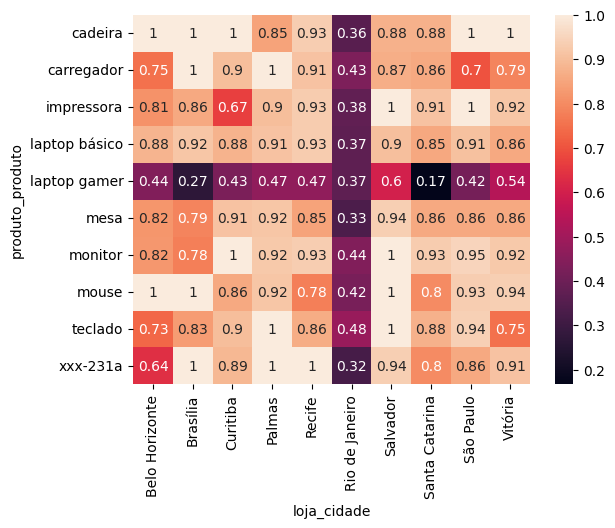

In [98]:
graf_dados = df.pivot_table(index='produto_produto', columns='loja_cidade', values ='pg', aggfunc='mean')

sns.heatmap(graf_dados,annot=True)
plt.show()
#Valore plotados são a % de pagamentos realizados


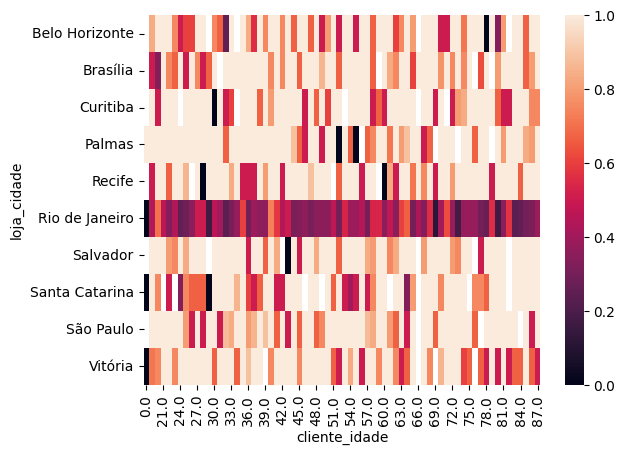

In [99]:
graf_dados = df.pivot_table(index='loja_cidade', columns='cliente_idade', values ='pg', aggfunc='mean')

sns.heatmap(graf_dados)
plt.show()

# Machine Learning 


## Alvo

In [100]:
dfML = df[['cliente_sexo','loja_cidade','produto_produto','produto_valor','cliente_idade','promoção','pg']]
dfML = dfML.replace([' ','-'],'_', regex=True)
dfML

,cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promoção,pg
id,,,,,,,
1,M,Palmas,laptop_básico,2300.0,72.0,0,1
2,F,Palmas,laptop_básico,2300.0,50.0,1,1
3,M,Salvador,cadeira,540.0,60.0,1,1
4,M,Belo_Horizonte,laptop_básico,2300.0,80.0,0,0
5,M,Palmas,mouse,20.0,81.0,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,150.0,23.0,0,1
2997,F,Brasília,laptop_básico,2300.0,28.0,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,5300.0,36.0,0,0


## Normalização

In [101]:
dfML['produto_valor'] = dfML['produto_valor']/dfML['produto_valor'].max()
dfML['cliente_idade'] = dfML['cliente_idade']/dfML['cliente_idade'].max()
dfML

,cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promoção,pg
id,,,,,,,
1,M,Palmas,laptop_básico,0.433962,0.827586,0,1
2,F,Palmas,laptop_básico,0.433962,0.574713,1,1
3,M,Salvador,cadeira,0.101887,0.689655,1,1
4,M,Belo_Horizonte,laptop_básico,0.433962,0.919540,0,0
5,M,Palmas,mouse,0.003774,0.931034,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,0.028302,0.264368,0,1
2997,F,Brasília,laptop_básico,0.433962,0.321839,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,1.000000,0.413793,0,0


## Dados Categóricos

In [102]:
col_cat = ['cliente_sexo','loja_cidade','produto_produto','promoção']
dfML_dummies = pd.get_dummies(dfML[col_cat].astype(str), drop_first=False)
dfML_dummies

,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,loja_cidade_Rio_de_Janeiro,loja_cidade_Salvador,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2998,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [103]:
dfML = pd.concat([dfML, dfML_dummies], axis=1) 
dfML = dfML.drop(col_cat, axis=1)
dfML

,produto_valor,cliente_idade,pg,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,0.433962,0.827586,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.433962,0.574713,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0.101887,0.689655,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.433962,0.919540,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0.003774,0.931034,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.028302,0.264368,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2997,0.433962,0.321839,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2998,1.000000,0.413793,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Dados de treinamento e de teste

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc

y = dfML.pg
X = dfML.drop(['pg'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_new = X.loc[[2997,2998]]
X_new

,produto_valor,cliente_idade,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
2997,0.433962,0.321839,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2998,1.000000,0.413793,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Regressão Logística

In [105]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

all_col_with_plus = ' + '.join(dfML.drop(['pg'], axis=1).columns)
modelo = smf.glm(formula='pg ~ ' + all_col_with_plus, data=dfML,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     pg   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2977
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.6
Date:                Wed, 02 Nov 2022   Deviance:                       2677.1
Time:                        00:34:16   Pearson chi2:                 3.01e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2916
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [106]:
model = LogisticRegression(penalty='none', solver='newton-cg')
model.fit(X_train, y_train)

print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de Confusão
[[180 115]
 [ 76 529]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       928
           1       0.83      0.89      0.86      2072

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.80      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       295
           1       0.82      0.87      0.85       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



In [107]:
model.predict(X_new)

array([1, 0], dtype=int64)

## Árvore de Decisão

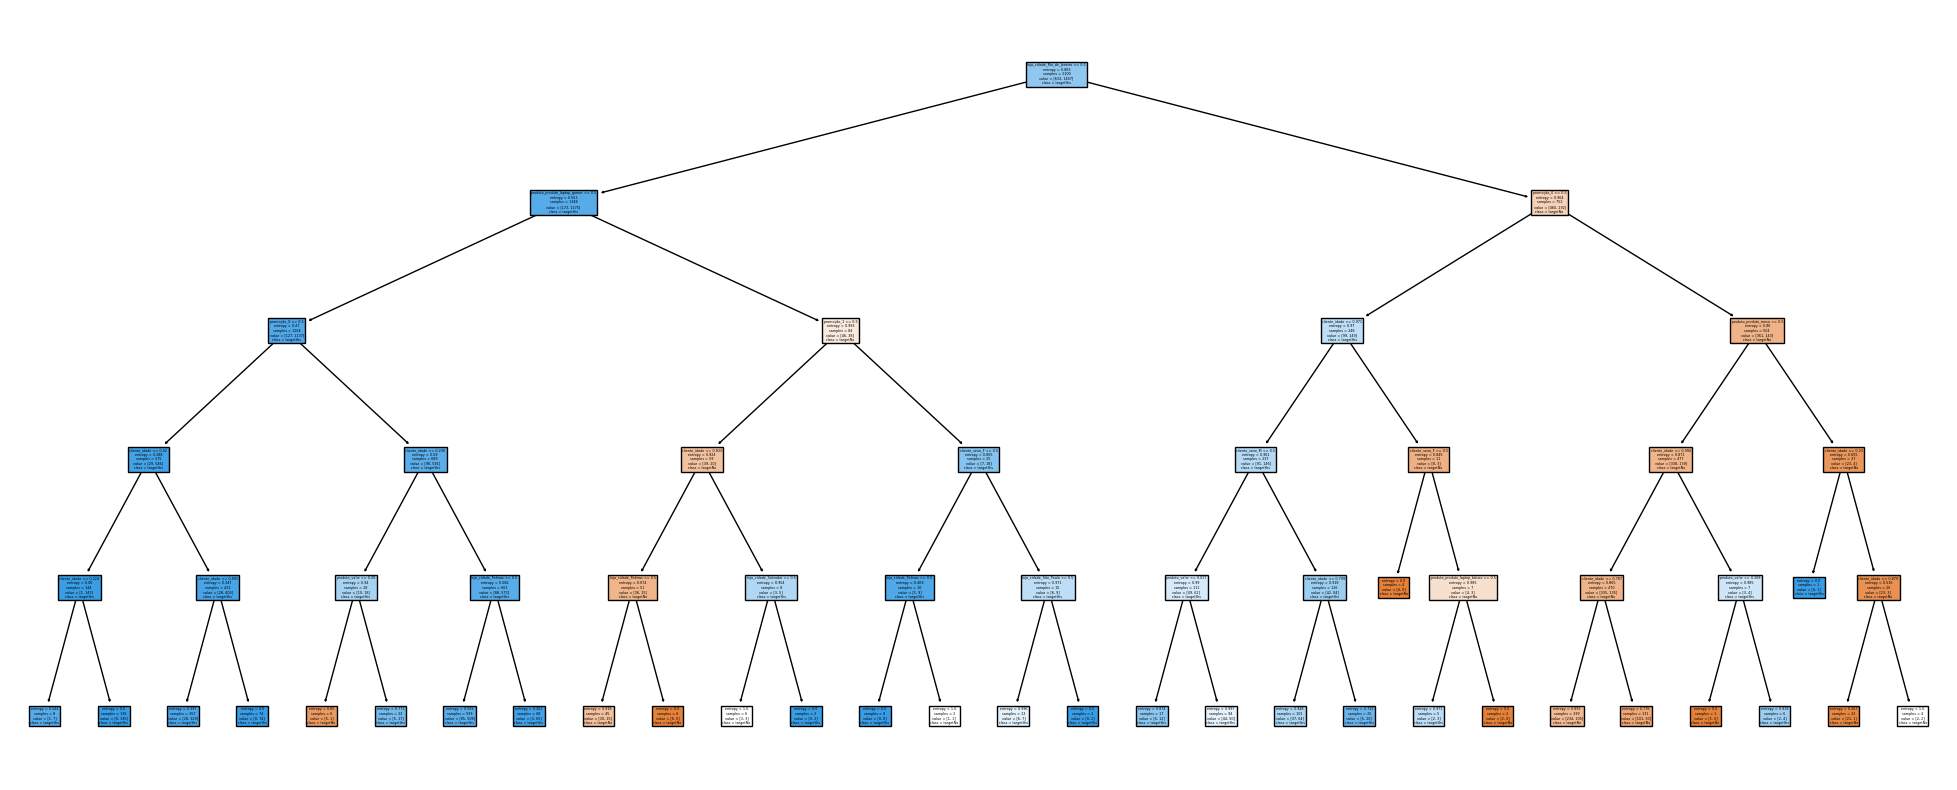

In [108]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model = model.fit(X_train,y_train)
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=['targetNo','targetYes'],
                   filled=True)
plt.show()

In [109]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de Confusão
[[188 107]
 [ 83 522]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.71      0.64      0.68       928
           1       0.85      0.88      0.87      2072

    accuracy                           0.81      3000
   macro avg       0.78      0.76      0.77      3000
weighted avg       0.81      0.81      0.81      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       295
           1       0.83      0.86      0.85       605

    accuracy                           0.79       900
   macro avg       0.76      0.75      0.76       900
weighted avg       0.79      0.79      0.79       900



In [110]:
model.predict(X_new)

array([1, 0], dtype=int64)

## Redes Neurais

In [111]:
from keras import Sequential
from keras.layers import Dense
import keras
import tensorflow
tensorflow.random.set_seed(2)

model = Sequential()
model.add(Dense(15, activation='relu', kernel_initializer='random_normal', input_dim=len(X.columns)))
model.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [112]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=128, epochs=300, verbose=False)

In [113]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, (model.predict(X_test) > 0.5).astype("int32")))
print('\n- Reporte completo')
print(classification_report(y, (model.predict(X) > 0.5).astype("int32")))
print('\n- Reporte teste')
print(classification_report(y_test, (model.predict(X_test) > 0.5).astype("int32")))

- Matriz de Confusão
29/29 [==============================] - 0s 1ms/step
[[191 104]
 [ 81 524]]

- Reporte completo
94/94 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       928
           1       0.85      0.88      0.86      2072

    accuracy                           0.81      3000
   macro avg       0.77      0.76      0.77      3000
weighted avg       0.80      0.81      0.80      3000


- Reporte teste
29/29 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       295
           1       0.83      0.87      0.85       605

    accuracy                           0.79       900
   macro avg       0.77      0.76      0.76       900
weighted avg       0.79      0.79      0.79       900



In [114]:
model.predict(X_new)

1/1 [==============================] - 0s 28ms/step


array([[0.8603963],
       [0.3122907]], dtype=float32)

## XGBoost

In [115]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [116]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de Confusão
[[178 117]
 [ 97 508]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       928
           1       0.90      0.91      0.91      2072

    accuracy                           0.87      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.87      0.87      0.87      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.65      0.60      0.62       295
           1       0.81      0.84      0.83       605

    accuracy                           0.76       900
   macro avg       0.73      0.72      0.73       900
weighted avg       0.76      0.76      0.76       900



In [117]:
model.predict(X_new)

array([1, 0])